In [1]:
from __future__ import division, print_function
from keras import backend as K
from keras.layers import Input
from keras.callbacks import ModelCheckpoint
from keras.layers.core import Activation, Dense, Dropout, Lambda
from keras.layers.merge import Concatenate
from keras.models import Model, load_model
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from keras.optimizers import Adam
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50

from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import itertools
import numpy as np
import os
import pandas as pd

from PIL.Image import LANCZOS
from PIL import Image
from PIL import ImageFile
Image.MAX_IMAGE_PIXELS = 1000000000                                                                                              
ImageFile.LOAD_TRUNCATED_IMAGES = True

Using TensorFlow backend.


In [2]:
import keras
import numpy as np
import random as randit
import pandas as pd
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import os
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras_applications import xception
from keras.models import Model, load_model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras_preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt

In [3]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [4]:
all_data = pd.read_csv('/home/josesoengas/painters/data/all_data_info_custom.csv')
train_data = pd.read_csv('/home/josesoengas/painters/data/train_info.csv')
test_data = pd.read_csv('/home/josesoengas/painters/data/test_info.csv')

IMG_DIR = 'home/josesoengas/painters/data/'
OUTPUT_DIR = 'home/josesoengas/painters/data/output'

#ALL_IMG_LIST = all_data['new_filename'].tolist()
#TRAIN_IMG_LIST = train_data['filename'].tolist()
#TEST_IMG_LIST = test_data['new_filename'].tolist()

os.makedirs(OUTPUT_DIR, exist_ok=True)

#print("Amount of train images: " + str(len(ALL_IMG_LIST)))
#print("Amount of train images: " + str(len(TRAIN_IMG_LIST)))
#print("Amount of test images: " + str(len(TEST_IMG_LIST)))

In [5]:
train_df = pd.read_csv('/home/josesoengas/painters/data/train_info.csv')

In [6]:
train_datagen= ImageDataGenerator(validation_split=0.1)

train_batchsize = 128
val_batchsize = 128
 
train_generator = train_datagen.flow_from_dataframe(
        dataframe = train_df,
        directory = '/home/josesoengas/painters/data/train/',
        x_col = 'filename',
        y_col = 'artist',
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical',
        subset = 'training')
 
validation_generator = train_datagen.flow_from_dataframe(
        dataframe = train_df,
        directory = '/home/josesoengas/painters/data/train/',
        x_col = 'filename',
        y_col = 'artist',
        target_size=(224, 224),
        batch_size = val_batchsize,
        class_mode='categorical',
        subset = 'validation')

Found 71490 validated image filenames belonging to 1584 classes.
Found 7943 validated image filenames belonging to 1584 classes.


In [7]:
# create the base pre-trained model
base_model = keras.applications.xception.Xception(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling=None)

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1816, activation='relu')(x)
predictions = Dense(1584, activation='softmax')(x)

In [9]:
model = Model(inputs=base_model.input, outputs=predictions)

In [10]:
for layer in base_model.layers:
    layer.trainable = False

In [11]:
# compile the model (should be done *after* setting layers to non-trainable)
# inser metrics accuacy within compile function

#adam = Adam(lr=.001)
#model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=["accuracy"])

In [13]:
# train the model on the new data for a few epochs

history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=150,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('xception_last_layer_two_epoch.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
559/558 [==============================] - 1421s 3s/step - loss: 7.3664 - acc: 7.1277e-04 - val_loss: 13.3230 - val_acc: 2.5179e-04
Epoch 2/150
559/558 [==============================] - 239s 427ms/step - loss: 7.3400 - acc: 0.0016 - val_loss: 13.2014 - val_acc: 5.0359e-04
Epoch 3/150
559/558 [==============================] - 239s 428ms/step - loss: 7.3139 - acc: 0.0048 - val_loss: 13.1064 - val_acc: 6.2949e-04
Epoch 4/150
559/558 [==============================] - 237s 425ms/step - loss: 7.2864 - acc: 0.0078 - val_loss: 13.0774 - val_acc: 0.0010
Epoch 5/150
559/558 [==============================] - 239s 427ms/step - loss: 7.2572 - acc: 0.0089 - val_loss: 13.1574 - val_acc: 0.0010
Epoch 6/150
559/558 [==============================] - 238s 427ms/step - loss: 7.2263 - acc: 0.0094 - val_loss: 13.3468 - val_acc: 8.8128e-04
Epoch 7/150
559/558 [==============================] - 240s 430ms/step - loss: 7.1930 - acc: 0.0095 - val_

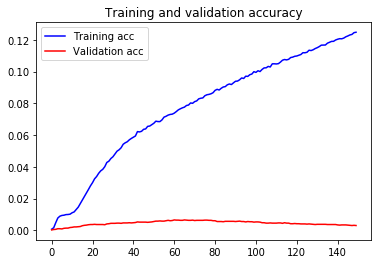

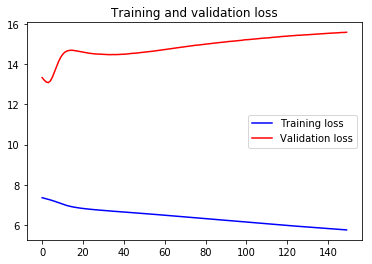

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [12]:
model.load_weights('/home/josesoengas/xception_last_layer_0.0001_0.1Val.h5')

In [13]:
for layer in model.layers[:126]:
   layer.trainable = False
for layer in model.layers[126:]:
   layer.trainable = True

In [14]:
# compile the model (should be done *after* setting layers to non-trainable)
# inser metrics accuacy within compile function

adam = Adam(lr=.0001)
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

In [15]:
# train the model on the new data for a few epochs
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=6,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('xception_last_block_0.0001_0.1Val.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/6
2235/2234 [==============================] - 253s 113ms/step - loss: 2.0261 - acc: 0.5608 - val_loss: 16.0677 - val_acc: 0.0029
Epoch 2/6
2235/2234 [==============================] - 245s 110ms/step - loss: 1.4219 - acc: 0.6888 - val_loss: 16.0654 - val_acc: 0.0031
Epoch 3/6
2235/2234 [==============================] - 245s 110ms/step - loss: 1.0538 - acc: 0.7742 - val_loss: 16.0679 - val_acc: 0.0029
Epoch 4/6
2235/2234 [==============================] - 244s 109ms/step - loss: 0.7835 - acc: 0.8397 - val_loss: 16.0665 - val_acc: 0.0031
Epoch 5/6
2235/2234 [==============================] - 244s 109ms/step - loss: 0.5631 - acc: 0.8945 - val_loss: 16.0705 - val_acc: 0.0026
Epoch 6/6
2235/2234 [==============================] - 244s 109ms/step - loss: 0.4021 - acc: 0.9295 - val_loss: 16.0599 - val_acc: 0.0029


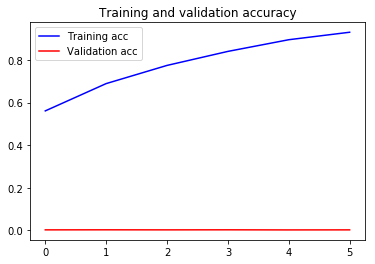

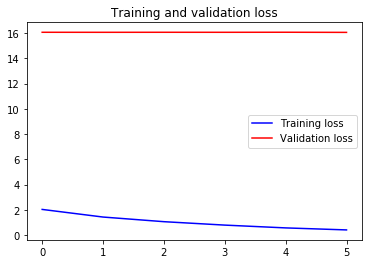

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()